# Chapter 4 Exercises

In this notebook we consider a subset of problems to do some calculations and shed light as to how do certain proofs / exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import multivariate_normal, seed
from numpy.linalg import inv
from sklearn.preprocessing import OneHotEncoder

In [2]:
%config InlineBackend.figure_format = "retina"
np.set_printoptions(precision=4, suppress=True)

## 4.2
Consideer the minimization of a sum-of-squares error function given by

$$
    E_D\left(\tilde{\bf W}\right) = \text{Tr}\left([\tilde{\bf X}\tilde{\bf W} -  {\bf T}]^T[\tilde{\bf X}\tilde{\bf W} -  {\bf T}]\right)
$$

and suppose that all of the target vectors in the training $\{{\bf t}_n\}_n$ set satisfy a linear constraint

$$
    {\bf a}^T{\bf t}_n + b = 0
$$

Show that as a consecuence of this constraint, the elements of the model prediction ${\bf y}({\bf x})$ given by the least squares solution

$$
    \tilde{\bf W} = \left(\tilde{\bf X}^T\tilde{\bf X}\right)^{-1}\tilde{\bf X}^T{\bf T}
$$

also satisfies this constraint so that 

$$
    {\bf a}^T{\bf y}({\bf x}) + b = 0
$$

In [3]:
# According to Bishop, a clear example of this is by one-hot-encoding all target variables
# so as to satisfy a linear constraint of the form 1^t x + 0 = 1 (p.145)

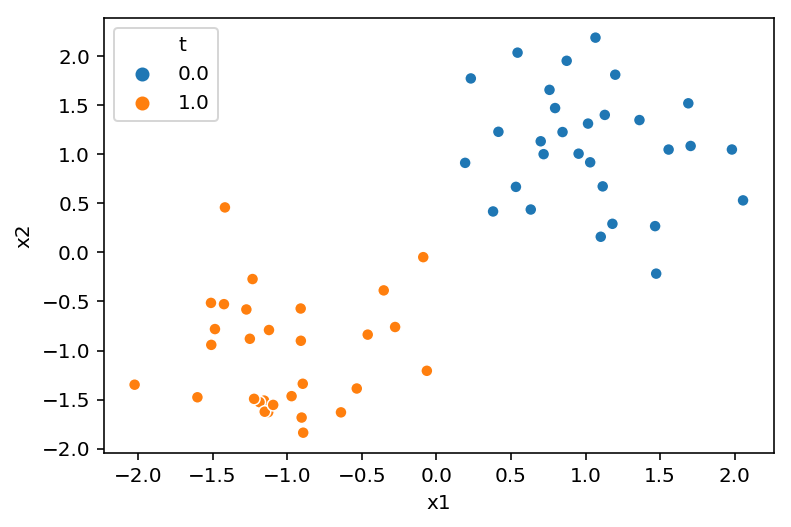

In [4]:
seed(314)
nobs = 30
x1 = multivariate_normal([-1, -1], np.eye(2) * 0.3, nobs)
t1 = np.ones(nobs)

x2 = multivariate_normal([1, 1], np.eye(2) * 0.3, nobs)
t2 = np.zeros(nobs)

D = np.c_[np.r_[x1, x2], np.r_[t1, t2]]
D = pd.DataFrame(D, columns=["x1", "x2", "t"])

sns.scatterplot("x1", "x2", hue="t", data=D)

In [5]:
ohe = OneHotEncoder(categories="auto", sparse=False)
T = ohe.fit_transform(D["t"].values[:, np.newaxis])
T[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [6]:
Xtilde = np.c_[np.ones(2 * nobs), D[["x1", "x2"]]]
Xtilde[:5]

array([[ 1.    , -0.909 , -0.5717],
       [ 1.    , -0.5332, -1.3873],
       [ 1.    , -1.5103, -0.5144],
       [ 1.    , -1.1215, -0.7909],
       [ 1.    , -1.4232, -0.5273]])

In [7]:
W = inv(Xtilde.T @ Xtilde) @ Xtilde.T @ T
W.shape # (nfeats, nclasses)

(3, 2)

Up to this point, it is easy to see that the constraint

$$
    {\bf a}^T {\bf t}_n + b = 0
$$

is satisfied for a one-hot-encoded vector ${\bf t}_n$ by choosing $\bf{a} = \bf{1}$ (a vector of ones) and $b = -1$

In [8]:
a = np.ones(2)
b = -1
a @ T[0] + b

0.0

In [9]:
# Or more generally,
np.all(T @ a - 1 == 0)

True

Now, considering a new set of points generated by a different probability distribution,

In [10]:
Xtest = multivariate_normal([0, 0], np.eye(2) * 0.3, nobs)
Xtest = np.c_[np.ones(nobs), Xtest]
Xtest[:5]

array([[ 1.    ,  0.0042, -0.2876],
       [ 1.    ,  1.0095, -0.2514],
       [ 1.    ,  0.3646,  1.1981],
       [ 1.    ,  0.2661,  0.3501],
       [ 1.    ,  0.2703, -0.326 ]])

In [11]:
# We can make batch estimations via
yest = Xtest @ W 
yest[:5]

array([[0.4452, 0.5548],
       [0.7067, 0.2933],
       [0.8043, 0.1957],
       [0.6265, 0.3735],
       [0.5058, 0.4942]])

In [12]:
# Which, as we see, does satisfy the imposed linear constraint
yest @ a + b

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0., -0.,  0.,  0.])

To understand why this is the case,

In [87]:
-b * np.ones((1, 2 * nobs)) @ Xtilde @ inv(Xtilde.T @ Xtilde) @ Xtest[[0]].T

array([[1.]])

In [105]:
np.ones((1, 2 * nobs)) @ Xtilde @ inv(Xtilde.T @ Xtilde).T

array([[ 1., -0.,  0.]])

In [102]:
Xtilde @ inv(Xtilde.T @ Xtilde)

array([[ 0.0166, -0.0163,  0.0051],
       [ 0.0173,  0.0172, -0.0289],
       [ 0.0162, -0.0383,  0.022 ],
       [ 0.0166, -0.018 ,  0.0038],
       [ 0.0163, -0.035 ,  0.0194],
       [ 0.017 , -0.001 , -0.017 ],
       [ 0.0164, -0.0285,  0.014 ],
       [ 0.0171,  0.0036, -0.0184],
       [ 0.0167, -0.0013,  0.0001],
       [ 0.0167, -0.0018, -0.0034],
       [ 0.0165, -0.0349,  0.0098],
       [ 0.0157, -0.0597,  0.0489],
       [ 0.0168, -0.0079, -0.0048],
       [ 0.017 ,  0.0102, -0.0165],
       [ 0.0174,  0.0162, -0.0334],
       [ 0.017 , -0.0016, -0.0167],
       [ 0.0171,  0.0029, -0.0212],
       [ 0.0162, -0.0349,  0.0223],
       [ 0.0165, -0.0275,  0.009 ],
       [ 0.0168, -0.0172, -0.0047],
       [ 0.0164, -0.0307,  0.0133],
       [ 0.0171,  0.0042, -0.0203],
       [ 0.017 ,  0.0059, -0.0143],
       [ 0.0174,  0.0288, -0.0353],
       [ 0.0171,  0.002 , -0.0205],
       [ 0.017 , -0.0038, -0.0148],
       [ 0.0166, -0.0202,  0.0044],
       [ 0.0174,  0.0197, -0

In [99]:
inv(Xtilde.T @ Xtilde) @ Xtest[[1]].T

array([[ 0.0174],
       [ 0.0415],
       [-0.0337]])